**Imports**

In [2]:
# Imports

import numpy as np
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline

**Plotting Function**

In [3]:
# Drawing function

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((3,3)), cmap='Greys_r')  
    return fig, axes

**Examples of Mounatains**

(9,)


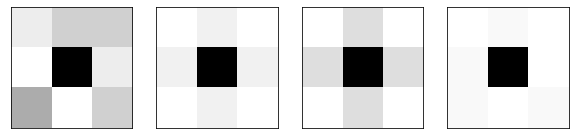

In [19]:
# Examples of mountains
faces = [np.array([0.2,0.3,0.3,0.1,0.8,0.2,0.4,0.1,0.3]),
         np.array([0,0.1,0,0.1,0.9,0.1,0,0.1,0]),
         np.array([0.1,0.3,0.1,0.3,1,0.3,0.1,0.3,0.1]),
         np.array([0.49,0.51,0.49,0.51,0.95,0.49,0.51,0.49,0.51])]
    
array = np.array([0.2,0.3,0.3,0.1,0.8,0.2,0.4,0.1,0.3])
print(array.shape)

_ = view_samples(faces, 1, 4)

**Examples of Noise**

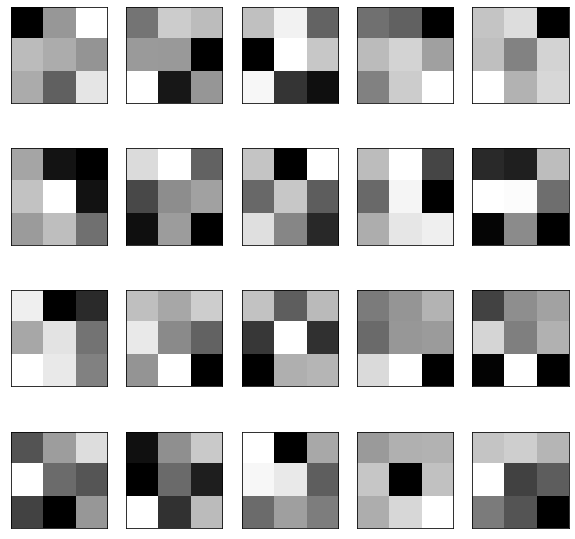

In [5]:
# Examples of noisy images
noise = [np.random.randn(3,3) for i in range(20)]
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 4,5)

**Building the Neural Networks

In [13]:
# The sigmoid activation function
def sigmoid(x):
  return np.exp(x)/(1.0+np.exp(x))

**The Discriminator**

In [15]:
class Discriminator():
  def __init__(self):
    self.weights = np.array([np.random.normal() for i in range(9)])
    self.bias = np.random.normal()

  def forward(self, x):
    #print (x, self.weights)
    return sigmoid(np.dot(x, self.weights) + self.bias)

  def error_from_image(self, image):
    prediction = self.forward(image)
    return -np.log(prediction)

  def derivative_from_image(self, image):
    prediction = self.forward(image)
    derivatives_weights = -image * (1-prediction)
    derivatives_bias = -(1-prediction)
    return derivatives_weights, derivatives_bias

  def update_from_image(self, x):
    ders = self.derivative_from_image(x)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

  def error_from_noise(self, noise):
    prediction = self.forward(noise)
    return -np.log(1-prediction)

  def derivative_from_noise(self, noise):
    prediction = self.forward(noise)
    derivatives_weights = noise * prediction
    derivatives_bias = prediction
    return derivatives_weights, derivatives_bias

  def update_from_noise(self, noise):
    ders = self.derivative_from_noise(noise)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

**The Generator**

In [8]:
class Generator():
  def __init__(self):
    self.weights = np.array([np.random.normal() for i in range(9)])
    self.biases = np.array([np.random.normal() for i in range(9)])

  def forward(self, z):
    return sigmoid(z * self.weights + self.biases)

  def error(self, z, discriminator):
    x = self.forward(z)
    y = discriminator.forward(x)
    return -np.log(y)

  def derivatives(self, z, discriminator):
    discriminator_weights = discriminator.weights
    discriminator_bias = discriminator.bias
    x = self.forward(z)
    y = discriminator.forward(x)
    factor = -(1-y) * discriminator_weights * x * (1-x)
    derivative_weights = factor * z
    derivative_bias = factor
    return derivative_weights, derivative_bias

  def update(self, z, discriminator):
    error_before = self.error(z, discriminator)
    ders = self.derivatives(z, discriminator)
    self.weights -= learning_rate * ders[0]
    self.biases -= learning_rate * ders[1]
    error_after = self.error(z, discriminator)

**Training**

In [14]:
# Set Random Seed
np.random.seed(100)

learning_rate = 0.1
epochs = 10000

# The GAN
D = Discriminator()
G = Generator()

errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
  for face in faces:
    D.update_from_image(face)

    z = random.rand()

    errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))

    errors_generator.append(G.error(z, D))

    noise = G.forward(z)

    D.update_from_noise(noise)

    G.update(z,D)

Streaming output truncated to the last 5000 lines.
  0.43819789 -0.20968885  0.07481321]
[0.12032964 0.15626075 0.38542842 0.30384041 0.96841774 0.38558726
 0.22647931 0.16096136 0.12108903] [ 0.33801254  0.2398821  -0.50594408  0.57994366 -0.37470164 -0.59170023
  0.43819789 -0.20968885  0.07481321]
[0.12032964 0.15626075 0.38542842 0.30384041 0.96841774 0.38558726
 0.22647931 0.16096136 0.12108903] [ 0.33212809  0.23224051 -0.52479261  0.56508501 -0.42205999 -0.61055653
  0.42712241 -0.21756031  0.06889162]
[0.12032964 0.15626075 0.38542842 0.30384041 0.96841774 0.38558726
 0.22647931 0.16096136 0.12108903] [ 0.33212809  0.23224051 -0.52479261  0.56508501 -0.42205999 -0.61055653
  0.42712241 -0.21756031  0.06889162]
[0.12062294 0.15657886 0.38311263 0.30583471 0.96838664 0.38289269
 0.22751307 0.16064917 0.12115048] [ 0.33212809  0.23224051 -0.52479261  0.56508501 -0.42205999 -0.61055653
  0.42712241 -0.21756031  0.06889162]
[0.2 0.3 0.3 0.1 0.8 0.2 0.4 0.1 0.3] [ 0.33212809  0.23224

KeyboardInterrupt: ignored

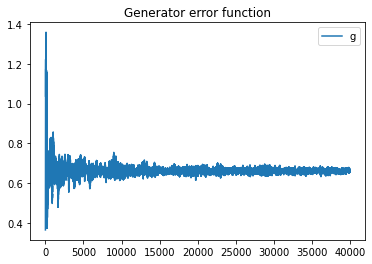

Text(0.5, 1.0, 'Discriminaotr error function')

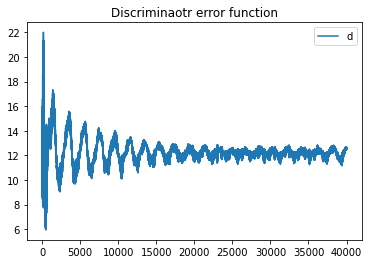

In [ ]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminaotr error function")

**Generated Images**

[0.18303428 0.25445516 0.11517996 0.25375809 0.96276547 0.29926331
 0.16677491 0.25120917 0.1551541 ]
[0.18510113 0.25654287 0.11935518 0.2535074  0.96084743 0.30084459
 0.17091534 0.25026754 0.1596426 ]
[0.24922393 0.31833502 0.29183928 0.24666074 0.85328257 0.34621765
 0.31740348 0.22524346 0.3256795 ]
[0.19655406 0.26798925 0.14416819 0.25215878 0.94876881 0.30945031
 0.19464645 0.24523196 0.1856645 ]


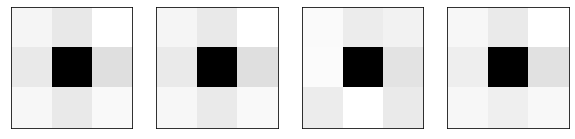

In [ ]:
generated_images = []
for i in range(4):
  z = random.random()
  generated_image = G.forward(z)
  generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
  print(i)

**Studying the weights and biases of the Generator and Discriminator**

In [ ]:
print("Generator Weights" , G.weights)
print("Generator Biases" , G.biases)

Generator Weights [-0.44154936 -0.35214144 -1.29423175  0.04248898  1.67558808 -0.24157083
 -0.94665514  0.16081385 -1.08593085]
Generator Biases [-1.0901427  -0.75137497 -0.84949796 -1.11771553  1.71271887 -0.62880636
 -0.73868885 -1.23996064 -0.69677202]


In [ ]:
print("Discriminator Weights" , D.weights)
print("Discriminator Biases" , D.bias)

Discriminator Weights [ 0.05764651  0.07471277  0.12854168  0.15403857 -0.09316423 -0.03621195
 -0.06873204 -0.14155828 -0.14387195]
Discriminator Biases 0.04148416573428906
